# Qualifying results overview

Plot the qualifying result with visualization the fastest times.


In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta

import fastf1
import fastf1.plotting
from fastf1.core import Laps


# Enable Matplotlib patches for plotting timedelta values
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme=None)


session = fastf1.get_session(2025, 2, 'Q')
session.load()

core           INFO 	Loading data for Chinese Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '63', '4', '1', '44', '16', '6', '12', '22', '23', '31', '27', '14', '18', '55', '10', '87', '7', '5', '30']


First, we need to get an array of all drivers.



In [28]:
drivers = pd.unique(session.laps['Driver'])
print(drivers)

['PIA' 'RUS' 'NOR' 'VER' 'HAM' 'LEC' 'HAD' 'ANT' 'TSU' 'ALB' 'OCO' 'HUL'
 'ALO' 'STR' 'SAI' 'GAS' 'BEA' 'DOO' 'BOR' 'LAW']


After that we'll get each driver's fastest lap, create a new laps object
from these laps, sort them by lap time and have pandas reindex them to
number them nicely by starting position.



In [29]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_drivers(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
print(list_fastest_laps)
fastest_laps = Laps(list_fastest_laps) \
    .sort_values(by='LapTime') \
    .reset_index(drop=True)

[Time                      0 days 01:13:05.010000
Driver                                       PIA
DriverNumber                                  81
LapTime                   0 days 00:01:30.641000
LapNumber                                   19.0
Stint                                        6.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:23.996000
Sector2Time               0 days 00:00:27.227000
Sector3Time               0 days 00:00:39.418000
Sector1SessionTime        0 days 01:11:58.365000
Sector2SessionTime        0 days 01:12:25.592000
Sector3SessionTime        0 days 01:13:05.010000
SpeedI1                                    284.0
SpeedI2                                    278.0
SpeedFL                                    272.0
SpeedST                                    329.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife           

The plot is nicer to look at and more easily understandable if we just plot
the time differences. Therefore, we subtract the fastest lap time from all
other lap times.



In [30]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

We can take a quick look at the laps we have to check if everything
looks all right. For this, we'll just check the 'Driver', 'LapTime'
and 'LapTimeDelta' columns.



In [31]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     PIA 0 days 00:01:30.641000        0 days 00:00:00
1     RUS 0 days 00:01:30.723000 0 days 00:00:00.082000
2     NOR 0 days 00:01:30.787000 0 days 00:00:00.146000
3     VER 0 days 00:01:30.817000 0 days 00:00:00.176000
4     HAM 0 days 00:01:30.927000 0 days 00:00:00.286000
5     LEC 0 days 00:01:31.021000 0 days 00:00:00.380000
6     HAD 0 days 00:01:31.079000 0 days 00:00:00.438000
7     ANT 0 days 00:01:31.103000 0 days 00:00:00.462000
8     TSU 0 days 00:01:31.238000 0 days 00:00:00.597000
9     ALB 0 days 00:01:31.503000 0 days 00:00:00.862000
10    OCO 0 days 00:01:31.625000 0 days 00:00:00.984000
11    SAI 0 days 00:01:31.628000 0 days 00:00:00.987000
12    HUL 0 days 00:01:31.632000 0 days 00:00:00.991000
13    ALO 0 days 00:01:31.688000 0 days 00:00:01.047000
14    STR 0 days 00:01:31.773000 0 days 00:00:01.132000
15    GAS 0 days 00:01:31.992000 0 days 00:00:01.351000
16    BEA 0 days 00:01:32.018000 0 days 00:00:01

Finally, we'll create a list of team colors per lap to color our plot.



In [32]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.get_team_color(lap['Team'], session=session)
    team_colors.append(color)

Now, we can plot all the data



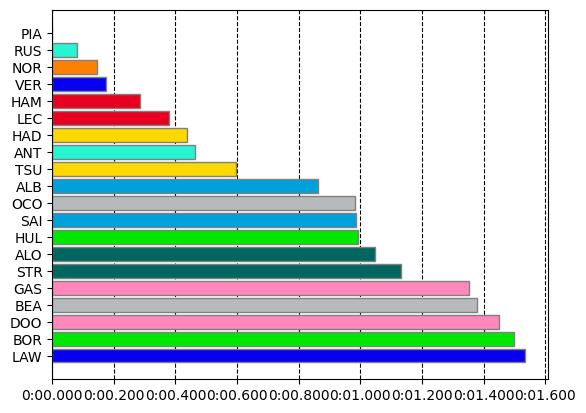

In [33]:
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

Finally, give the plot a meaningful title



In [34]:
lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

<Figure size 640x480 with 0 Axes>